In [1]:
! git clone https://github.com/cann-emma/myfork-3001labs.git

Cloning into 'myfork-3001labs'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 155 (delta 59), reused 56 (delta 35), pack-reused 59 (from 1)
Receiving objects: 100% (155/155), 21.05 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (68/68), done.


# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
air = pd.read_csv('/content/myfork-3001labs/04_hedonic_pricing/airbnb_hw.csv')

In [4]:
print(air.shape)
air.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
air.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [6]:
air.isna().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [7]:
air = air.iloc[:,[3, 4, 6, 8, 9, 10, 11]]
air.dtypes

,0
Neighbourhood,object
Property Type,object
Room Type,object
Beds,float64
Number of Records,int64
Number Of Reviews,int64
Price,object


In [8]:
air.isna().sum()

,0
Neighbourhood,0
Property Type,3
Room Type,0
Beds,85
Number of Records,0
Number Of Reviews,0
Price,0


In [9]:
air= air.dropna(subset= ['Beds', 'Property Type'])

In [10]:
print(air.isna().sum())
print(air.shape)

Neighbourhood        0
Property Type        0
Room Type            0
Beds                 0
Number of Records    0
Number Of Reviews    0
Price                0
dtype: int64
(30390, 7)


In [11]:
air.columns

Index(['Neighbourhood ', 'Property Type', 'Room Type', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price'],
      dtype='object')

In [12]:
air['Price']= air['Price'].str.replace(',', '')

air['Price']= pd.to_numeric(air['Price'],  errors= 'coerce')
print(air['Price'].dtypes)
air['Price'].unique()

int64


array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,   239,   220,   399,
         130,   375,   585,   275,   139,   260,    35,   133,   300,
         289,   179,    98,   195,    29,    27,    39,   249,   192,
         142,   169,  1000,   131,   138,   113,   122,   329,   101,
         475,   238,   272,    69,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [13]:
air.dtypes

,0
Neighbourhood,object
Property Type,object
Room Type,object
Beds,float64
Number of Records,int64
Number Of Reviews,int64
Price,int64


In [14]:
air['price_log']= np.log(air['Price'])

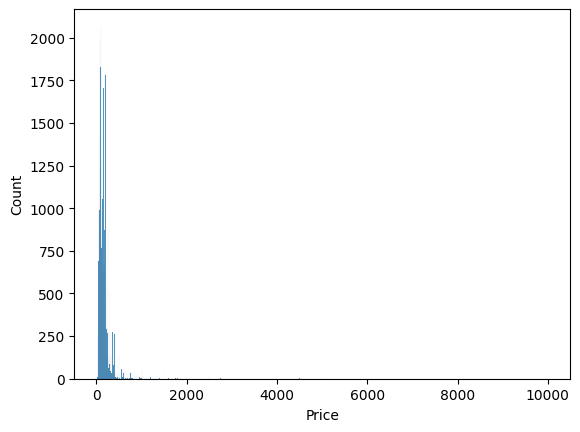

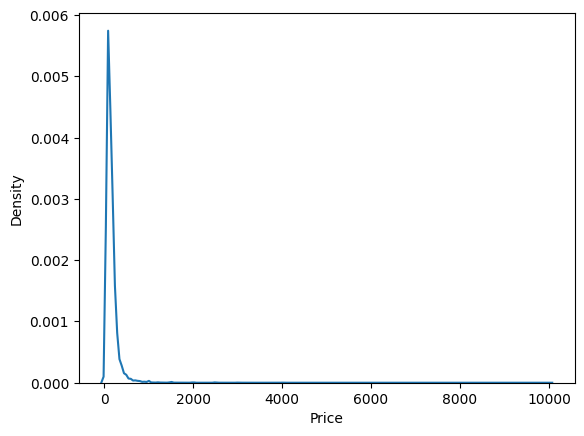

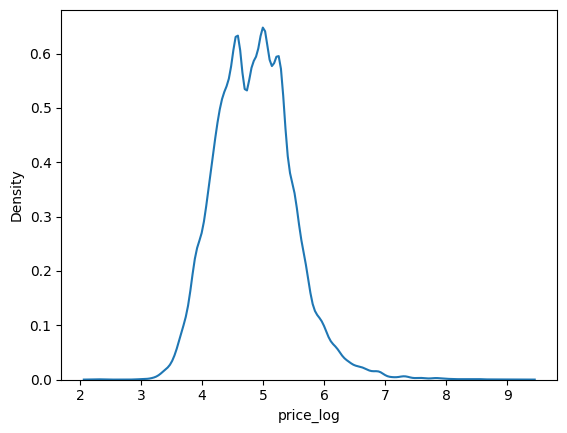

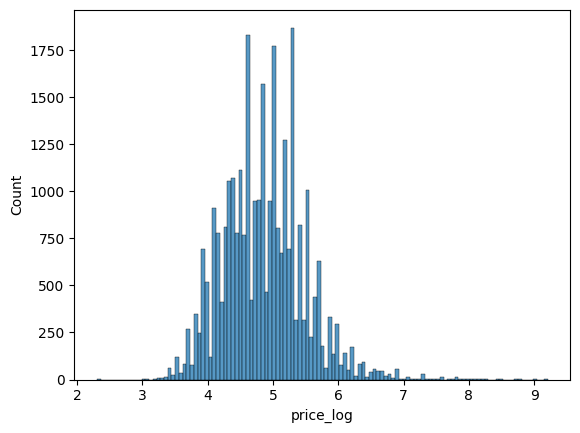

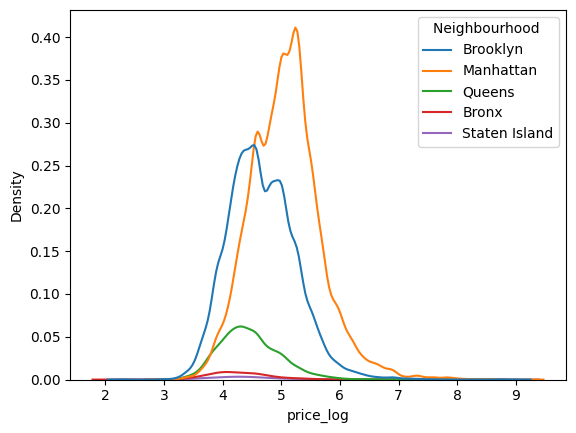

In [15]:
sns.histplot(air, x= 'Price')
plt.show()
sns.kdeplot(air, x= 'Price')
plt.show()
sns.kdeplot(air, x= 'price_log')
plt.show()
sns.histplot(air, x= 'price_log')
plt.show()

sns.kdeplot(air, x= 'price_log', hue= 'Neighbourhood ' )
plt.show()

Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [16]:
air[['Price','Neighbourhood ', 'Property Type', 'Room Type' ]].groupby(['Neighbourhood ','Property Type', 'Room Type'] )[['Price' ]].mean()

Price
Neighbourhood  Property Type   Room Type                  
Bronx          Apartment       Entire home/apt  118.787879
                               Private room      68.759690
                               Shared room       55.130435
               Bed & Breakfast Private room      94.166667
               Condominium     Entire home/apt   80.000000
...                                                    ...
Staten Island  House           Shared room       59.500000
               Loft            Entire home/apt  135.000000
               Other           Private room      81.500000
               Townhouse       Entire home/apt   66.000000
                               Private room      57.000000

[113 rows x 1 columns]

In [17]:
air[['Price','Neighbourhood ']].groupby(['Neighbourhood '] )[['Price' ]].mean()

,Price
Neighbourhood,
Bronx,94.718023
Brooklyn,129.501203
Manhattan,198.204315
Queens,103.215669
Staten Island,164.109589


In [18]:
air[['Price', 'Property Type']].groupby(['Property Type'] )[['Price' ]].mean()

,Price
Property Type,
Apartment,161.871859
Bed & Breakfast,106.572222
Boat,153.625000
Bungalow,150.750000
Cabin,165.000000
Camper/RV,103.571429
Castle,150.000000
Chalet,99.000000
Condominium,256.585106


In [19]:
air[['Price', 'Room Type' ]].groupby(['Room Type'] )[['Price' ]].mean()

,Price
Room Type,
Entire home/apt,220.827978
Private room,91.407281
Shared room,80.136256


In [20]:
air.columns

Index(['Neighbourhood ', 'Property Type', 'Room Type', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price', 'price_log'],
      dtype='object')

In [41]:
y= air['Price']
X= pd.get_dummies(air['Neighbourhood '], dtype= 'int')

Implement an 80/20 train-test split. Put the test data aside.

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  R2  on the both the training and test sets. Which of your models does the best?

In [43]:
# Simple Linear Models
from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Neighbourhood Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
print('Neighbourhood: ', results)



X1= pd.get_dummies(air['Room Type'], dtype= 'int')
X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size= 0.2, random_state= 100)
from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print(' Room Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
print('Room Type: ', results)



X2= pd.get_dummies(air['Property Type'], dtype= 'int')
X_train, X_test, y_train, y_test= train_test_split(X2, y, test_size= 0.2, random_state= 100)
from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Property Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
print('Property Type: ', results)


Neighbourhood Train R2:  0.04003605718765124
Test R2:  0.025488135011706436
RMSE:  229.83506021158465
Neighbourhood:          variable  coefficient
0          Bronx    95.599251
1       Brooklyn   129.806287
2      Manhattan   198.061675
3         Queens   101.794475
4  Staten Island   136.532787
 Room Train R2:  0.11967552363379297
Test R2:  0.07620899149116778
RMSE:  223.77397614637025
Room Type:            variable  coefficient
0  Entire home/apt   220.537472
1     Private room    91.010458
2      Shared room    78.811852
Property Train R2:  0.007306380010257296
Test R2:  0.0029112983409286253
RMSE:  232.48214869296854
Property Type:             variable  coefficient
0         Apartment   161.673529
1   Bed & Breakfast   110.381295
2              Boat   155.666667
3          Bungalow   136.000000
4             Cabin   250.000000
5         Camper/RV   113.333333
6            Castle   150.000000
7            Chalet    99.000000
8       Condominium   264.693333
9              Dorm    7

In [48]:
num1= air[['Beds']] #, 'Number of Records']] #, 'Number Of Reviews']]
X_train, X_test, y_train, y_test= train_test_split(num1, y, test_size= 0.2, random_state= 100)
from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
print('Results', results)

Train R2:  0.05860942732176899
Test R2:  0.07051926196627178
RMSE:  224.46204246032144
Results   variable  coefficient
0     Beds    92.005686


In [49]:
num1= air[['Number of Records']]
X_train, X_test, y_train, y_test= train_test_split(num1, y, test_size= 0.2, random_state= 100)
from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
print('Results', results)

Train R2:  0.0
Test R2:  -5.487091578637582e-05
RMSE:  232.82768932320704
Results             variable  coefficient
0  Number of Records   163.112496


In [50]:
num1= air[['Number Of Reviews']]
X_train, X_test, y_train, y_test= train_test_split(num1, y, test_size= 0.2, random_state= 100)
from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
print('Results', results)

Train R2:  -0.6165370525497977
Test R2:  -0.40094131073548733
RMSE:  275.57047464641033
Results             variable  coefficient
0  Number Of Reviews     2.818665


The room type and beds in the simple linear model performed best.

In [37]:
X= pd.concat([air['Beds'], pd.get_dummies(air['Neighbourhood '], dtype= 'int'),
               pd.get_dummies(air['Room Type'], dtype= 'int')],
              axis= 1)
y= air['Price']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

from sklearn import linear_model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Train R2: ', model.score(X_train, y_train))
print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

Train R2:  0.1946738439239707
Test R2:  0.14377340428058938
RMSE:  215.43540134113175


,variable,coefficient
0,Beds,4.645234e+01
1,Bronx,-6.822930e+14
2,Brooklyn,-6.822930e+14
3,Manhattan,-6.822930e+14
4,Queens,-6.822930e+14
5,Staten Island,-6.822930e+14
6,Entire home/apt,6.822930e+14
7,Private room,6.822930e+14
8,Shared room,6.822930e+14


Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  R2  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [32]:
# Interaction included
y= air['Price']
air['Room_N']= air['Room Type'].astype(str)+ ' in '+ air['Neighbourhood '].astype(str)
X= pd.concat([air['Beds'], pd.get_dummies(air['Room_N'], dtype= 'int')],
              axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('Train R2: ', model.score(X_train, y_train))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

Test R2:  0.1485218800453969
Train R2:  0.19915687793760128
RMSE:  214.83718816817665


,variable,coefficient
0,Beds,46.935063
1,Entire home/apt in Bronx,78.262543
2,Entire home/apt in Brooklyn,90.164611
3,Entire home/apt in Manhattan,167.245537
4,Entire home/apt in Queens,56.812471
5,Entire home/apt in Staten Island,79.057487
6,Private room in Bronx,4.464361
7,Private room in Brooklyn,25.868379
8,Private room in Manhattan,56.725472
9,Private room in Queens,17.211580


In [31]:
# Number of records and reviews most not relevant to price. Select most relevant predictors of price. Property Type also too similar to room type

y= air['price_log']
air['Room_N']= air['Room Type'].astype(str)+ ' in '+ air['Neighbourhood '].astype(str)
X= pd.concat([air['Beds'], pd.get_dummies(air['Room_N'], dtype= 'int')],
              axis= 1)

# air['Room_N']= air['Room Type'].astype(str)+ ' in '+ air['Neighbourhood '].astype(str)
# X= pd.concat([air['Beds'], pd.get_dummies(air['Room_N'], dtype= 'int'),
#               pd.get_dummies(air['Property Type'], dtype= 'int')],
#               axis= 1)


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('Train R2: ', model.score(X_train, y_train))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

Test R2:  0.542253977359167
Train R2:  0.5423479770162606
RMSE:  0.4232993860180941


,variable,coefficient
0,Beds,0.145206
1,Entire home/apt in Bronx,4.503654
2,Entire home/apt in Brooklyn,4.780587
3,Entire home/apt in Manhattan,5.096404
4,Entire home/apt in Queens,4.591684
5,Entire home/apt in Staten Island,4.527407
6,Private room in Bronx,3.915862
7,Private room in Brooklyn,4.138775
8,Private room in Manhattan,4.432083
9,Private room in Queens,4.049604


The linear model that includes transformations and interactions performed better with 54% of the variance in price explained by number of bed and the interaction between room type and neighbourhood.

**Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?**

Overfitting can be observed by comparing the training and testing model. Models with transformations and interactions typically perform better by capturing complex relationships. However, too many transformations and interactions can lead model to do poorly on predicting new data.